In [1]:
print("Hello JupyterLab")

Hello JupyterLab


In [2]:
import pandas
from sklearn import linear_model

df = pandas.read_csv(r'C:\Users\Administrateur\Downloads\cars.csv')

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


Coefficient
The coefficient is a factor that describes the relationship with an unknown variable.

Example: if x is a variable, then 2x is x two times. x is the unknown variable, and the number 2 is the coefficient.

In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [3]:
print(regr.coef_)

[0.00755095 0.00780526]


Result Explained
The result array represents the coefficient values of weight and volume.

Weight: 0.00755095

Volume: 0.00780526

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

I think that is a fair guess, but let test it!

We have already predicted that if a car with a 1300cm3 engine weighs 2300kg, the CO2 emission will be approximately 107g.

What if we increase the weight with 1000kg?

In [4]:
predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


We have predicted that a car with 1.3 liter engine, and a weight of 3300 kg, will release approximately 115 grams of CO2 for every kilometer it drives.

Which shows that the coefficient of 0.00755095 is correct:

107.2087328 + (1000 * 0.00755095) = 114.75968

Scale Features
When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?

The answer to this problem is scaling. We can scale data into new values that are easier to compare.

Take a look at the table below, it is the same data set that we used in the multiple regression chapter, but this time the volume column contains values in liters instead of cm3 (1.0 instead of 1000).

Car	Model	Volume	Weight	CO2	

Toyota	Aygo	1.0	790	99

Mitsubishi	Space Star	1.2	1160	95

....................................

....................................

Opel	Zafira	1.6	1405	109

Mercedes	SLK	2.5	1395	120

It can be difficult to compare the volume 1.0 with the weight 790, but if we scale them both into comparable values, we can easily see how much one value is compared to the other.

There are different methods for scaling data, in this tutorial we will use a method called standardization.

The standardization method uses this formula:

z = (x - u) / s

Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

If you take the weight column from the data set above, the first value is 790, and the scaled value will be:

(790 - 1292.23) / 238.74 = -2.1
If you take the volume column from the data set above, the first value is 1.0, and the scaled value will be:

(1.0 - 1.61) / 0.38 = -1.59

Now you can compare -2.1 with -1.59 instead of comparing 790 with 1.0.

You do not have to do this manually, the Python sklearn module has a method called StandardScaler() which returns a Scaler object with methods for transforming data sets.

In [5]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


Predict CO2 Values

The task in the Multiple Regression chapter was to predict the CO2 emission from a car when you only knew its weight and volume.

When the data set is scaled, you will have to use the scale when you predict values:

Example

Predict the CO2 emission from a 1.3 liter car that weighs 2300 kilograms:

In [6]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv(r'C:\Users\Administrateur\Downloads\cars.csv')

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


Evaluate Your Model

In Machine Learning we create models to predict the outcome of certain events, like in the previous chapter where we predicted the CO2 emission of a car when we knew the weight and engine size.

To measure if the model is good enough, we can use a method called Train/Test.

What is Train/Test
Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

80% for training, and 20% for testing.

You train the model using the training set.

You test the model using the testing set.

Train the model means create the model.

Test the model means test the accuracy of the model.

Start With a Data Set
Start with a data set you want to test.

Our data set illustrates 100 customers in a shop, and their shopping habits.

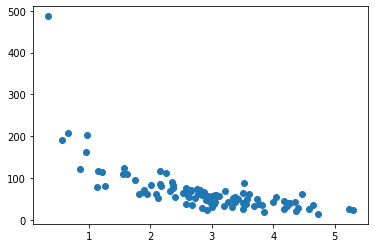

In [7]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

The x axis represents the number of minutes before making a purchase.

The y axis represents the amount of money spent on the purchase.

Split Into Train/Test
The training set should be a random selection of 80% of the original data.

The testing set should be the remaining 20%.



In [8]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

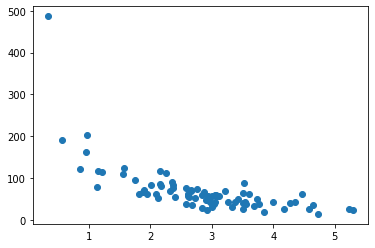

In [9]:
#Display the same scatter plot with the training set:
plt.scatter(train_x, train_y)
plt.show()

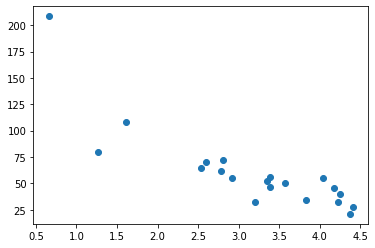

In [10]:
#To make sure the testing set is not completely different, we will take a look at the testing set as well.
plt.scatter(test_x, test_y)
plt.show()

What does the data set look like? In my opinion I think the best fit would be a polynomial regression, so let us draw a line of polynomial regression.

To draw a line through the data points, we use the plot() method of the matplotlib module:

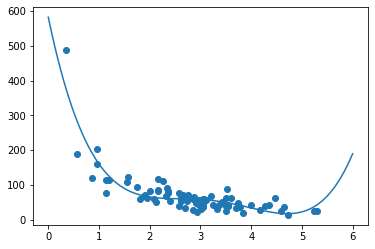

In [11]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

The result can back my suggestion of the data set fitting a polynomial regression, even though it would give us some weird results if we try to predict values outside of the data set. Example: 

the line indicates that a customer spending 6 minutes in the shop would make a purchase worth 200. That is probably a sign of overfitting.

But what about the R-squared score? The R-squared score is a good indicator of how well my data set is fitting the model.

R²
Remember R², also known as R-squared?

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called r2_score() that will help us find this relationship.

In this case we would like to measure the relationship between the minutes a customer stays in the shop and how much money they spend.

Example
How well does my training data fit in a polynomial regression?

In [12]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629798


Bring in the Testing Set
Now we have made a model that is OK, at least when it comes to training data.

Now we want to test the model with the testing data as well, to see if gives us the same result.

Example
Let us find the R2 score when using testing data:

In [13]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343625


Now that we have established that our model is OK, we can start predicting new values.

Example
How much money will a buying customer spend, if she or he stays in the shop for 5 minutes?

In [17]:
print(mymodel(5))

22.879625918116517


The example predicted the customer to spend 22.88 dollars, as seems to correspond to the diagram:

Machine Learning - Decision Tree

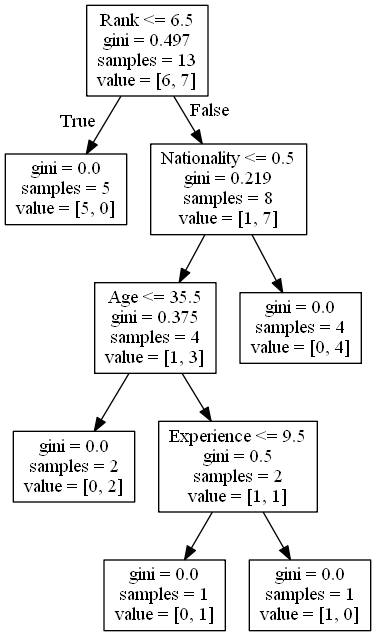

Decision Tree
In this chapter we will show you how to make a "Decision Tree". A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.